In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}' . format(sys.version))
print('Numpy: {}' . format(numpy.__version__))
print('Pandas: {}' . format(pandas.__version__))
print('Matplotlib: {}' . format(matplotlib.__version__))
print('Seaborn: {}' . format(seaborn.__version__))
print('Scipy: {}' . format(scipy.__version__))
print('Sklearn: {}' . format(sklearn.__version__))

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.19.2
Pandas: 1.1.3
Matplotlib: 3.3.2
Seaborn: 0.11.0
Scipy: 1.5.2
Sklearn: 0.23.2


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"E:\FILES\New folder\Excel Tutioral\New Datasets\Credit Card Fraud Detection\Credit Card.csv")

In [4]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

In [9]:
for column in df.columns:
    print(column,df[column].nunique())

Time 124592
V1 275663
V2 275663
V3 275663
V4 275663
V5 275663
V6 275663
V7 275663
V8 275663
V9 275663
V10 275663
V11 275663
V12 275663
V13 275663
V14 275663
V15 275663
V16 275663
V17 275663
V18 275663
V19 275663
V20 275663
V21 275663
V22 275663
V23 275663
V24 275663
V25 275663
V26 275663
V27 275663
V28 275663
Amount 32767
Class 2


In [10]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

[]

In [11]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [12]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns

[]

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


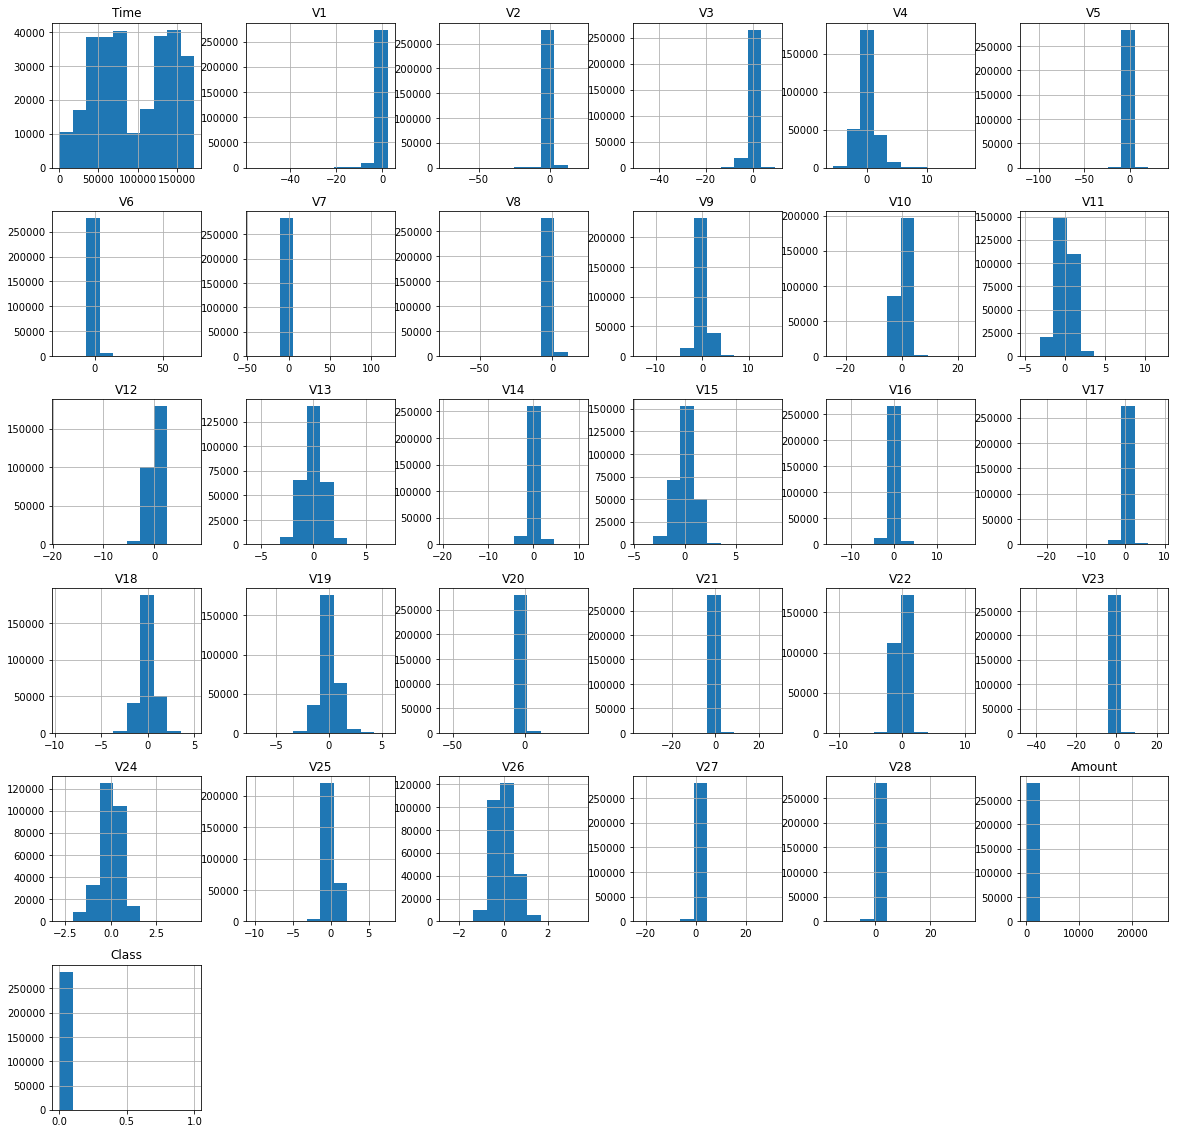

In [15]:
# print histogram for each parameter
df.hist(figsize=(20,20))
plt.show()

In [16]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [17]:
print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [18]:
#How different are the amount of money used in different transaction classes?
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [19]:
#Do fraudulent transactions occur more often during certain time frame ?
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


In [20]:
def pie_plot(column_name):
    df[column_name].value_counts().plot.pie(autopct = "%1.3f%%",colors = sns.color_palette("Set2",7),
                            startangle = 60,labels=["No","Yes"],
                            wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
    plt.title("Distribution of "+column_name+" " , size = 12)

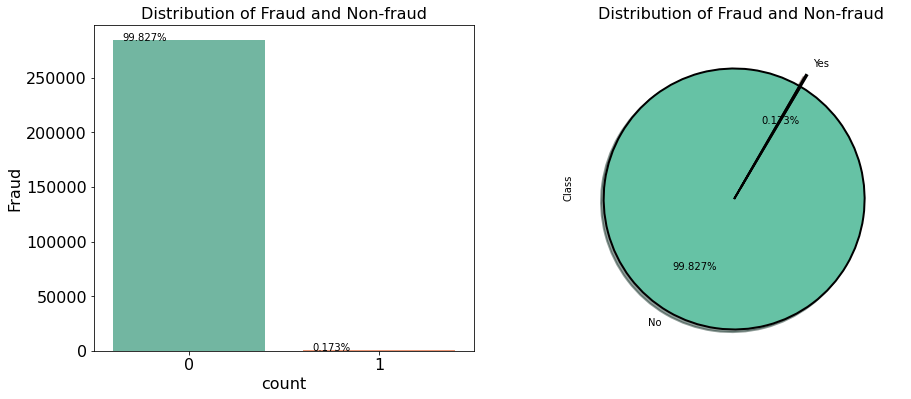

In [21]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,6))
plt.subplot(121)
ap = sns.countplot(x= 'Class', data = df,palette="Set2")
for p in ap.patches:
    ap.annotate('{:1.3f}%'.format((p.get_height()*100)/float(len(df["Class"]))), (p.get_x()+0.05, p.get_height()+20))  
plt.xticks(size = 16)
plt.ylabel('Fraud' , size =16)
plt.yticks(size = 16)
plt.xlabel('count' , size =16)
plt.title("Distribution of Fraud and Non-fraud", size =16)
plt.subplot(122)
pie_plot("Class")
plt.title("Distribution of Fraud and Non-fraud", size =16)
plt.show()

In [22]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


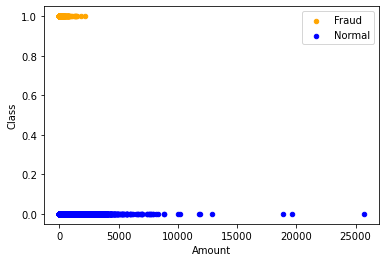

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [23]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

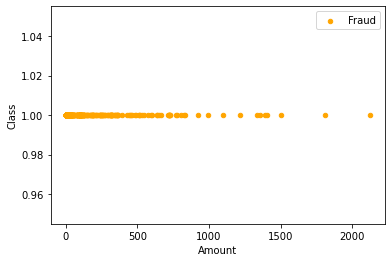

In [24]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

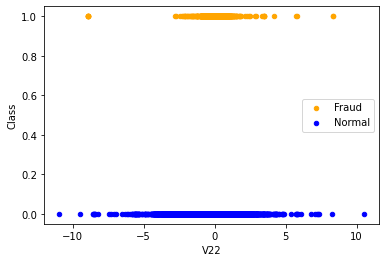

This feature may not be very important because of the similar distribution.


In [25]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

In [26]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

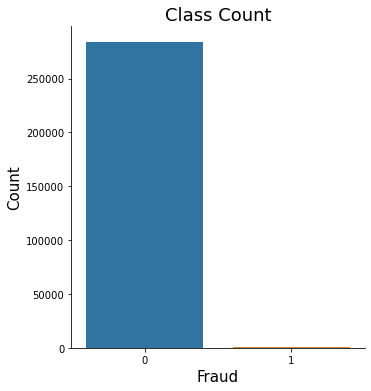

In [27]:
sns.factorplot(x = "Class",kind = 'count',data = df,size = 5)
plt.title("Class Count", fontsize = 18)
plt.xlabel("Fraud", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

In [28]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

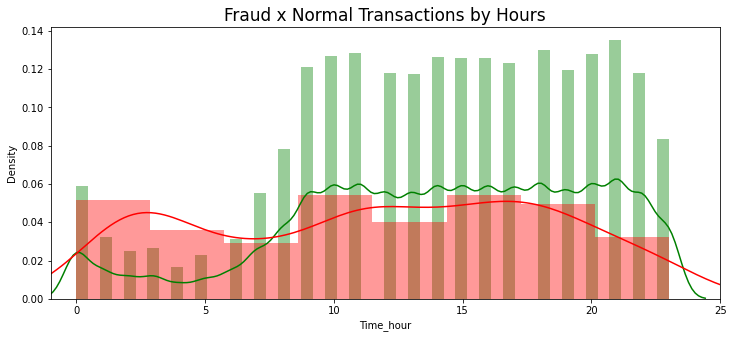

In [29]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

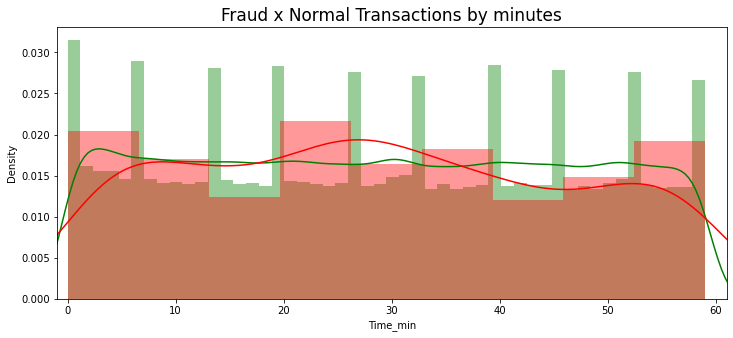

In [30]:
#by minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_min"], color='g')
sns.distplot(df[df['Class'] == 1]["Time_min"], color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

In [31]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [32]:
#Feature engineering to a better visualization of the values
df['Amount_log'] = np.log(df.Amount + 0.01)
df['Amount_log']

0         5.008166
1         0.993252
2         5.936665
3         4.816322
4         4.248495
            ...   
284802   -0.248461
284803    3.210844
284804    4.217889
284805    2.303585
284806    5.379943
Name: Amount_log, Length: 284807, dtype: float64

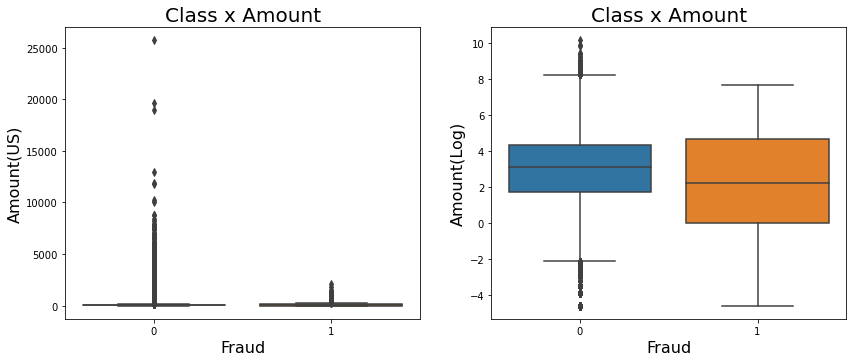

In [33]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x = "Class", y = "Amount", data = df)
ax.set_title("Class x Amount", fontsize = 20)
ax.set_xlabel("Fraud", fontsize = 16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class", y = "Amount_log", data = df)
ax1.set_title("Class x Amount", fontsize = 20)
ax1.set_xlabel("Fraud", fontsize = 16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

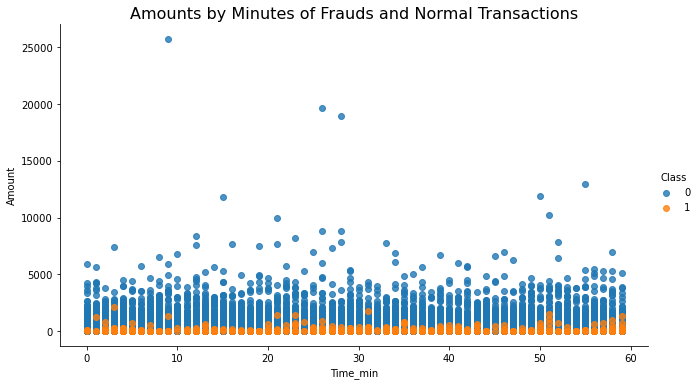

In [34]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y = "Amount", x = "Time_min", fit_reg = False,aspect = 1.8, data = df, hue = 'Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

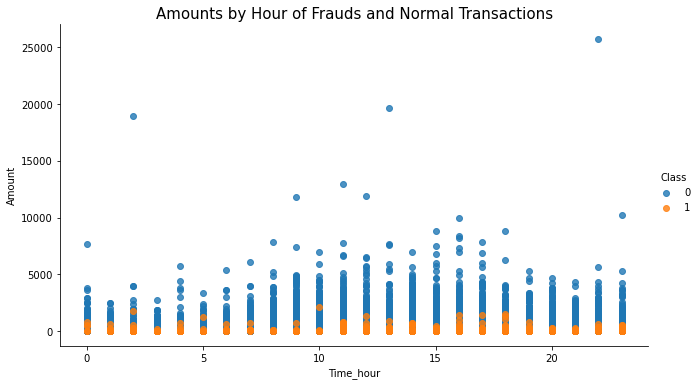

In [35]:
ax = sns.lmplot(y = "Amount", x = "Time_hour", fit_reg = False, aspect = 1.8, data = df, hue = 'Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize = 15)
plt.show()

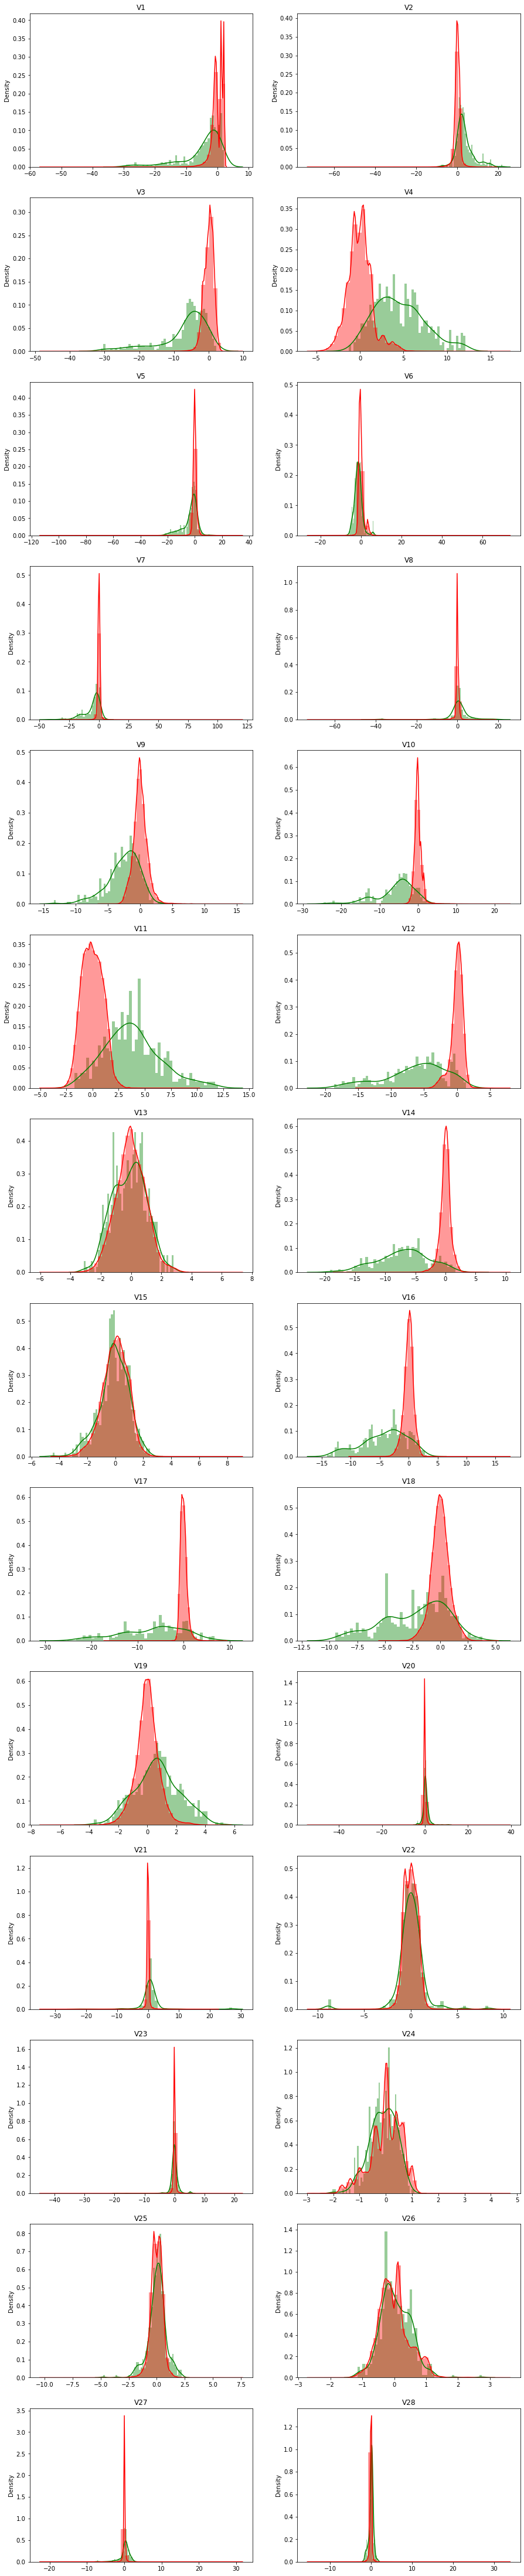

In [36]:
#Looking the V's features
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [37]:
fraud_percentage = 100* df[df["Class"] == 1].shape[0]/df.shape[0]
nonfraud_percentage = 100 * df[df["Class"] == 0].shape[0]/df.shape[0]

print("Total of samples: ", df.shape[0])
print("Non-Fraud Transactions: {:.3f}%".format(nonfraud_percentage))
print("Fraud Transactions: {:.3f}%".format(fraud_percentage))

Total of samples:  284807
Non-Fraud Transactions: 99.827%
Fraud Transactions: 0.173%


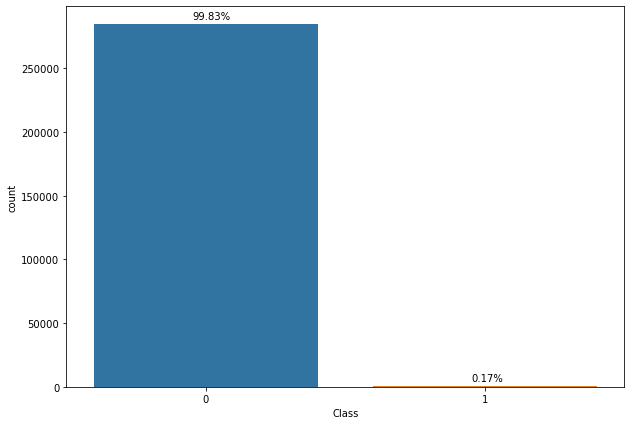

In [38]:
plt.figure(figsize = (10,7))
ax = sns.countplot('Class', data = df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height() / df.shape[0]), # Add % values to plot
                (p.get_x() + 0.35, p.get_height() + 4000))

<AxesSubplot:xlabel='Amount', ylabel='Density'>

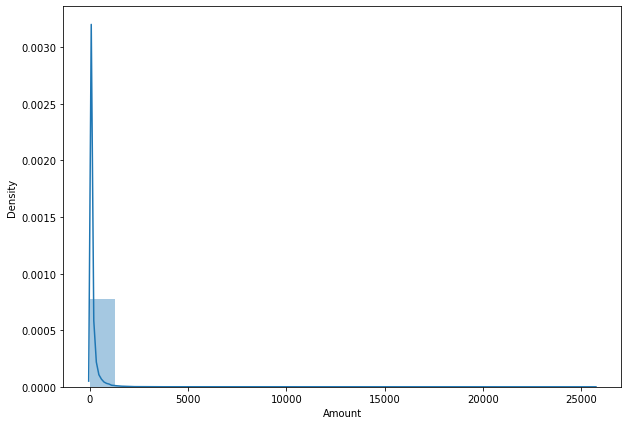

In [39]:
plt.figure(figsize = (10,7))
sns.distplot(df['Amount'], bins = 20)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

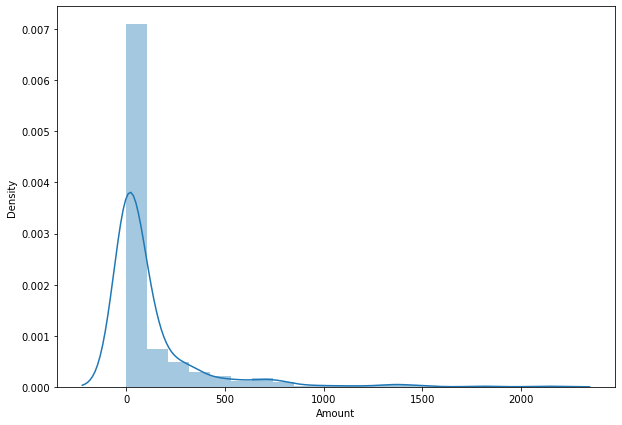

In [40]:
plt.figure(figsize = (10,7))
sns.distplot(df['Amount'][df["Class"] == 1], bins = 20)

<AxesSubplot:xlabel='Class', ylabel='Amount'>

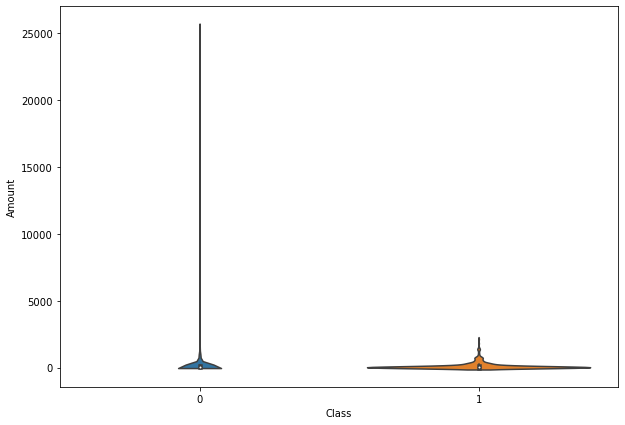

In [41]:
plt.figure(figsize = (10,7))
sns.violinplot(x = "Class", y = "Amount", data = df)

<AxesSubplot:xlabel='Time', ylabel='Density'>

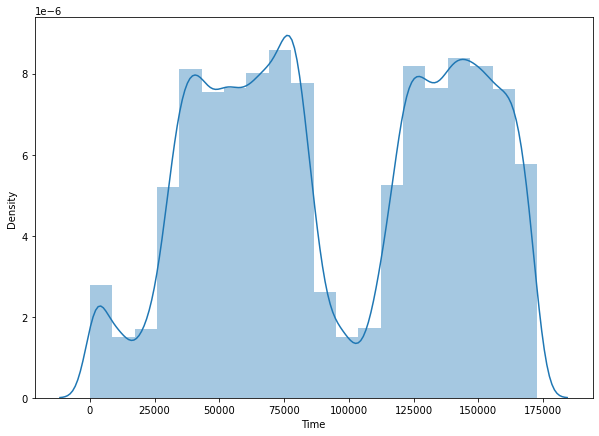

In [42]:
plt.figure(figsize = (10,7))
sns.distplot(df['Time'], bins = 20)

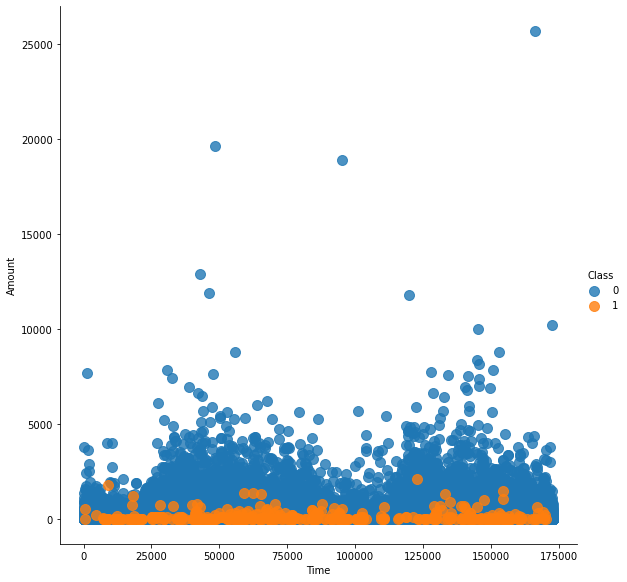

In [43]:
# Create scatterplot of dataframe
sns.lmplot('Time', # Horizontal axis
           'Amount', # Vertical axis
           data = df, # Data source
           fit_reg = False, # Don't fix a regression line
           hue = "Class", # Set color
           size = 8, # Size of the plot
           scatter_kws = {"marker": "D", # Set marker style
                        "s": 100}) # S marker size

In [44]:
df["DayTime"] = df["Time"]
df["DayTime"] = np.where(df['DayTime'] >= 86400, # if >= 86400 seconds = (1 day)
                           df['DayTime'] % 86400, # if >= 86400 seconds, get rest of division
                           df['DayTime']) # else

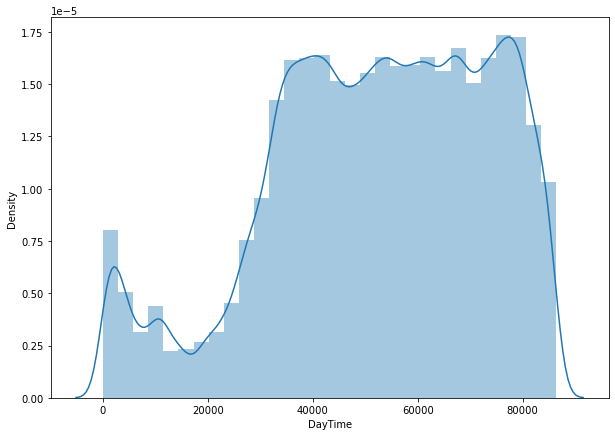

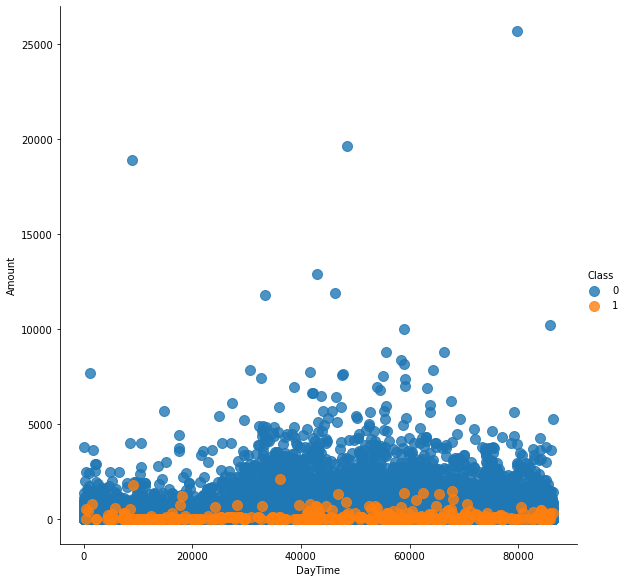

In [45]:
plt.figure(figsize = (10,7))
sns.distplot(df['DayTime'], bins = 30)

# Create scatterplot of dataframe
sns.lmplot('DayTime', # Horizontal axis
           'Amount', # Vertical axis
           data = df, # Data source
           fit_reg = False, # Don't fix a regression line
           hue = "Class", # Set color
           size = 8, # Size of the plot
           scatter_kws = {"marker": "D", # Set marker style
                        "s": 100}) # S marker siz

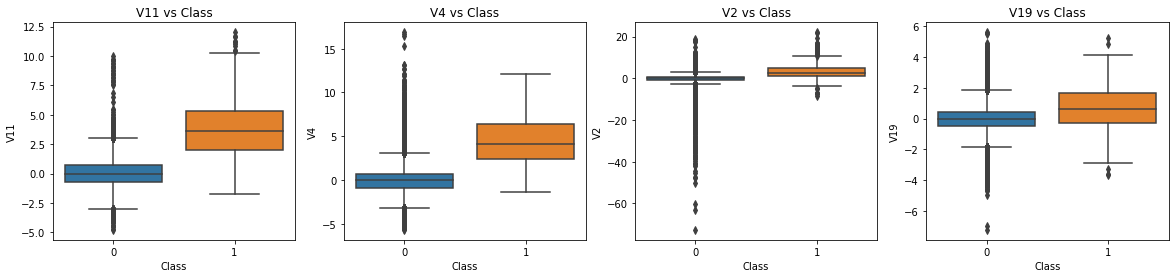

In [46]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations.
sns.boxplot(x = "Class", y = "V11", data = df, ax = axes[0])
axes[0].set_title('V11 vs Class')

sns.boxplot(x = "Class", y = "V4", data = df, ax = axes[1])
axes[1].set_title('V4 vs Class')

sns.boxplot(x = "Class", y = "V2", data = df, ax = axes[2])
axes[2].set_title('V2 vs Class')

sns.boxplot(x = "Class", y = "V19", data = df, ax = axes[3])
axes[3].set_title('V19 vs Class')

plt.show()

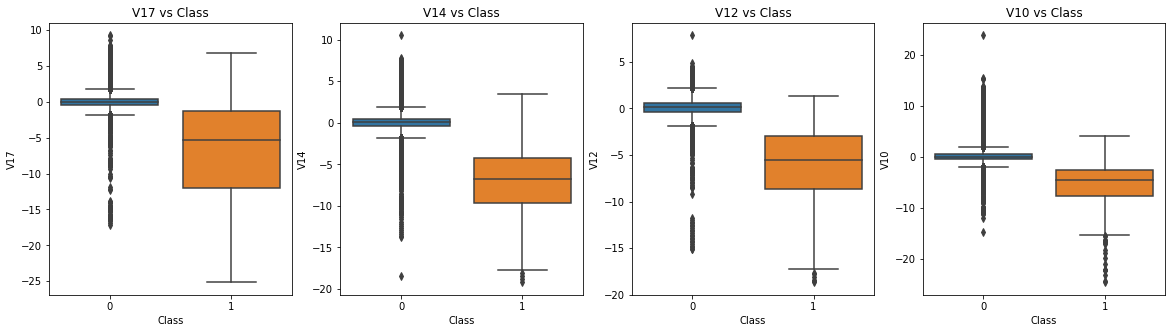

In [47]:
f, axes = plt.subplots(ncols=4, figsize=(20,5))

# Negative correlations.
sns.boxplot(x = "Class", y = "V17", data = df, ax = axes[0])
axes[0].set_title('V17 vs Class')

sns.boxplot(x = "Class", y = "V14", data = df, ax = axes[1])
axes[1].set_title('V14 vs Class')

sns.boxplot(x = "Class", y = "V12", data = df, ax = axes[2])
axes[2].set_title('V12 vs Class')

sns.boxplot(x = "Class", y = "V10", data = df, ax = axes[3])
axes[3].set_title('V10 vs Class')

plt.show()

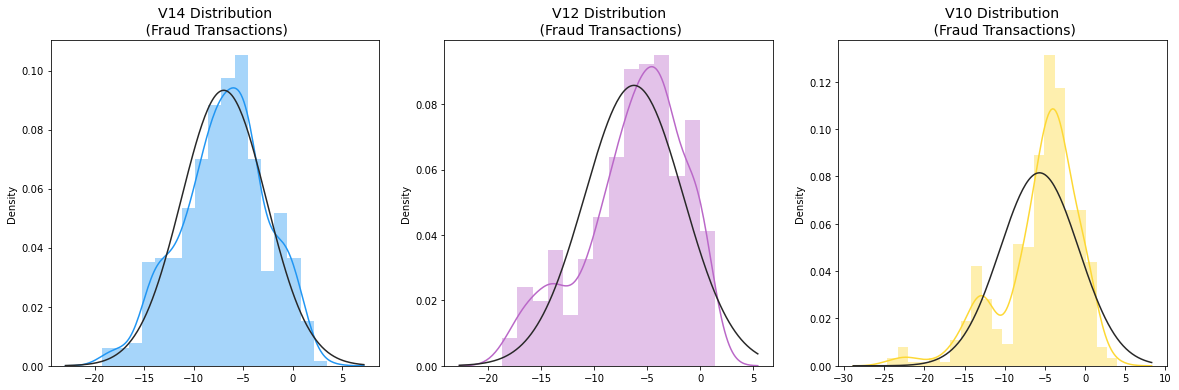

In [48]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#2196F3')
ax1.set_title('V14 Distribution\n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#BA68C8')
ax2.set_title('V12 Distribution\n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#FDD835')
ax3.set_title('V10 Distribution\n (Fraud Transactions)', fontsize=14)

plt.show()

In [49]:
# V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = df['V14'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

df = df.drop(df[(df['V14'] > v14_upper) | (df['V14'] < v14_lower)].index)
print('----' * 40)

# V12 removing outliers from fraud transactions
v12_fraud = df['V12'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V12'] > v12_upper) | (df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))
print('----' * 40)

# Removing outliers V10 Feature
v10_fraud = df['V10'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V10'] > v10_upper) | (df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 284506
----------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-15.124162814494698, -16.6496281595399, -18.27116

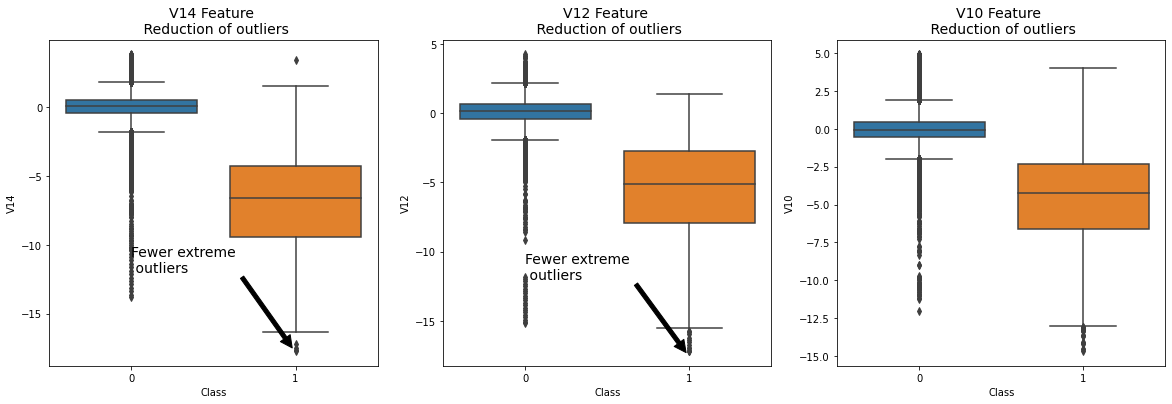

In [50]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# Feature V14
sns.boxplot(x = "Class", y = "V14", data = df,ax=ax1)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize = 14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'), fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data = df, ax = ax2)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'), fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=df, ax=ax3)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'), fontsize=14)

plt.show()

# 2D Scatter Plot

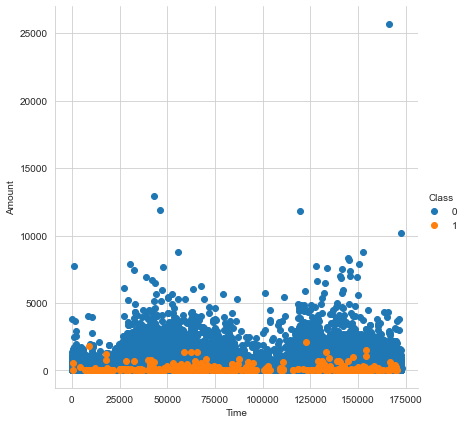

In [51]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

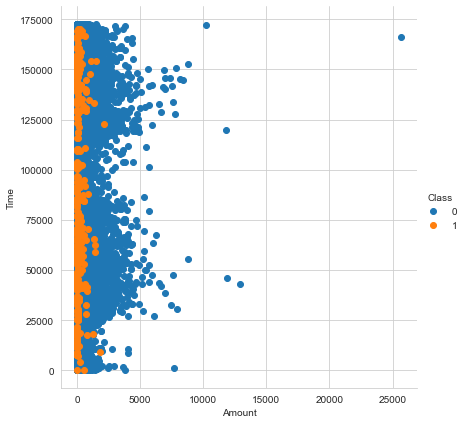

In [52]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

# 3D Scatter Plot

In [53]:
FilteredData = df[['Time','Amount', 'Class']]
FilteredData.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [54]:
print(FilteredData.shape)
FilteredData.head()

(283009, 3)


,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [55]:
FilteredData["Class"].value_counts()

0    282552
1       457
Name: Class, dtype: int64

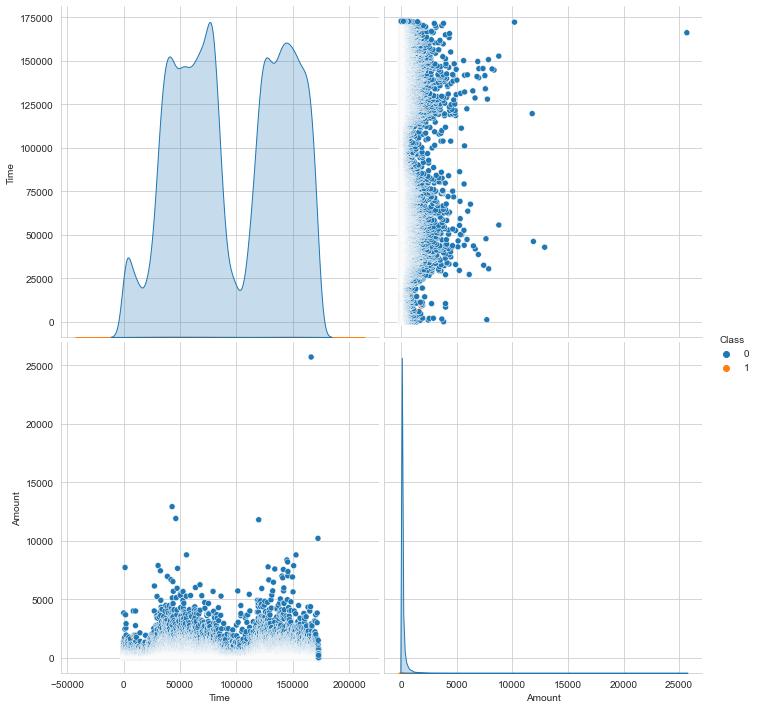

In [56]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show()

# Observations:

    Now it has been calculated that there are 284357 transactions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less than 2500

In [57]:
FilteredData["Class"].value_counts()

0    282552
1       457
Name: Class, dtype: int64

# Observations:

    Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.

# Histogram, PDF and CDF

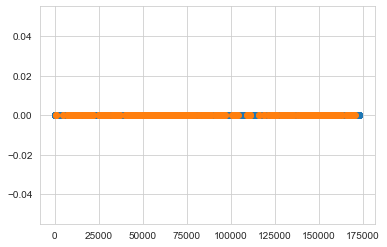

In [58]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

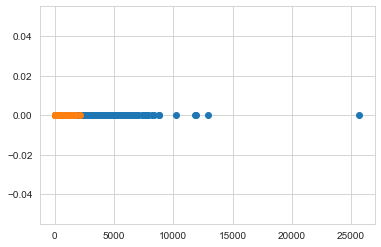

In [59]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()

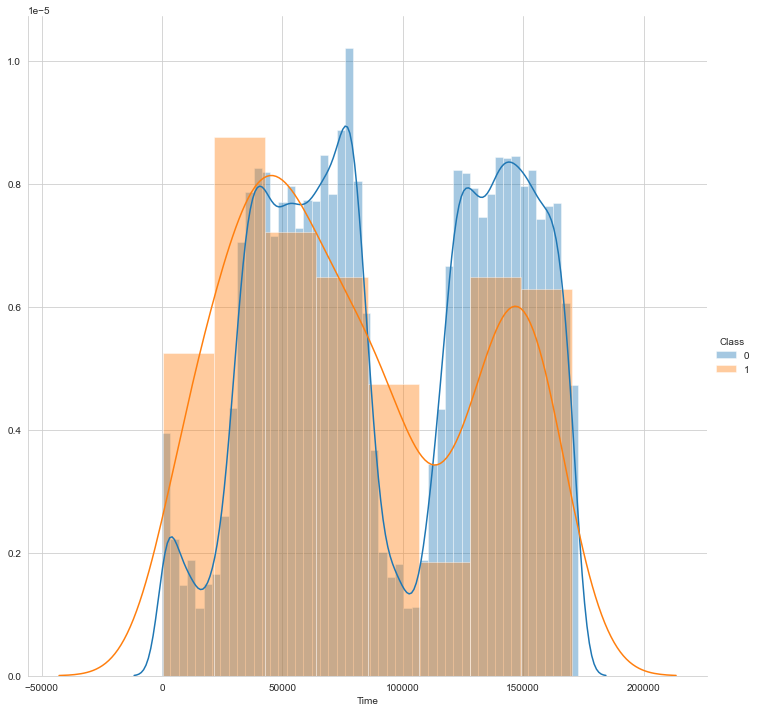

In [60]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

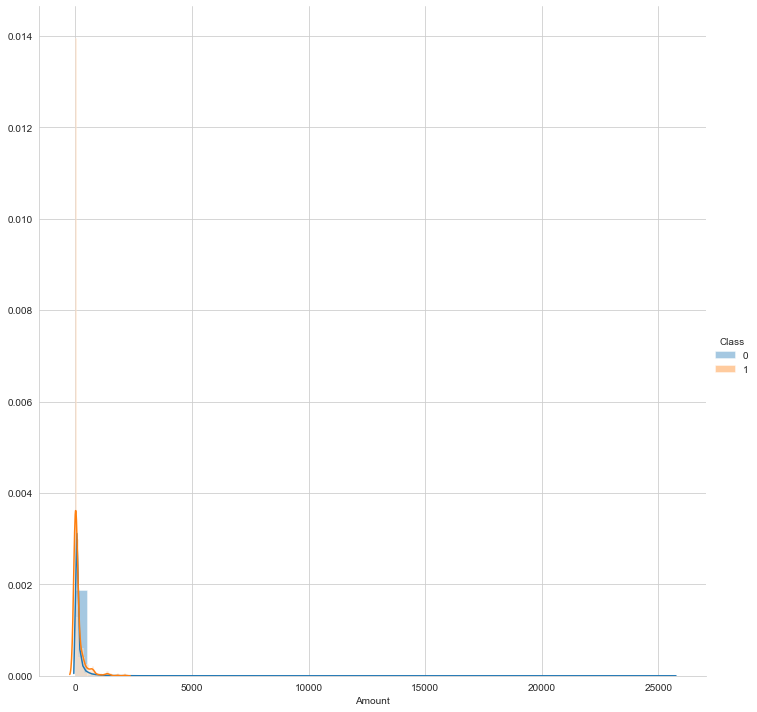

In [61]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

pdf =  [9.98554816e-01 1.27204435e-03 1.27204435e-04 3.18011088e-05
 7.06691307e-06 3.53345653e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.53345653e-06]


Counts = [3.88676423e-04 4.95129201e-07 4.95129201e-08 1.23782300e-08
 2.75071778e-09 1.37535889e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.37535889e-09]


Bin edges =  [    0.     2569.116  5138.232  7707.348 10276.464 12845.58  15414.696
 17983.812 20552.928 23122.044 25691.16 ]


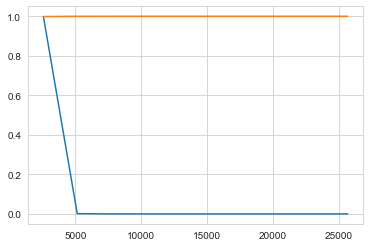

In [62]:
counts, bin_edges = np.histogram(FilteredData['Amount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

# Mean, Variance and Std-dev

In [63]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  88.41945606466702
Mean of transaction amount of fraud transactions:  128.96120350109405


In [64]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  244.64350722280426
Std-Deviation of transaction amount of fraud transactions:  264.4298215629473


In [65]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.18
Median of transaction amount of fraud transactions:  11.38


In [66]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.84 22.18 77.55]
[  0.     1.    11.38 111.7 ]


# Box Plot and Whiskers

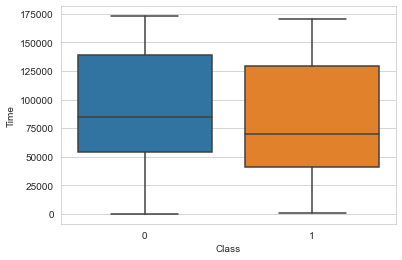

In [67]:
sns.boxplot(x = "Class", y = "Time", data = df)
plt.show()

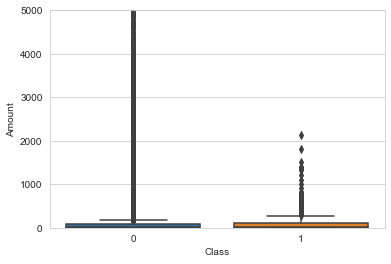

In [68]:
sns.boxplot(x = "Class", y = "Amount", data = df)
plt.ylim(0, 5000)
plt.show()

In [69]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  282552
Fraudulent transactions count:  457


# Training and Testing Data

In [70]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
Y = df['Class']

In [71]:
# Partition data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [72]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, Y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, Y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train);

In [73]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  100.0%

Model Accuracy:  100.0%

Confusion Matrix:
 [[189290      0]
 [     0    326]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    189290
           1       1.00      1.00      1.00       326

    accuracy                           1.00    189616
   macro avg       1.00      1.00      1.00    189616
weighted avg       1.00      1.00      1.00    189616


===== LogisticRegression =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  99.9%

Confusion Matrix:
 [[189223     67]
 [   134    192]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    189290
           1       0.74      0.59      0.66       326

    accuracy                           1.00    189616
   macro avg       0.87 

In [74]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

-6.281867387381013e-16
[ 5.90593455e-22  1.70694134e-16  3.99390525e-16  2.09555086e-16
 -1.78053526e-16  2.41775034e-16 -3.11547524e-16 -4.69834929e-16
  6.81594467e-17  1.45907211e-16 -5.45923682e-17  9.36305445e-17
 -1.46599414e-17 -1.13524953e-16 -1.04653228e-16  1.82699283e-17
 -1.99962162e-16  1.43079251e-16 -9.29466454e-18  2.05205900e-16
 -1.45402465e-15  2.03774144e-16  7.62675598e-17 -1.09395753e-16
 -2.18758185e-17  2.69990265e-16 -1.82370086e-17  1.54869869e-16
  6.89204020e-16  5.87559893e-18  1.00000000e+00  7.78166393e-19
  7.02451061e-18 -2.74573361e-17]


In [75]:
Y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 5.099585353971077e-16
Mean Squared Error: 9.279862069433246e-31
Root Mean Squared Error: 9.633204072079676e-16


In [76]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X, Y)
# Predict
Y_pred = regression_model.predict(X)

# model evaluation
rmse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-7.03135159e-23 -4.06648367e-16 -1.21041797e-15 -5.20455158e-16
  3.04494257e-16 -1.00641809e-15  6.57766103e-16  1.26982793e-15
 -5.33659505e-16 -5.35711280e-17 -4.26566778e-16  1.92981671e-16
 -2.42217206e-16  1.35608065e-16  2.96416006e-16  1.10332086e-16
 -7.36644137e-18 -1.61753110e-16  3.59743844e-16 -3.55880237e-16
  1.37383777e-15  3.43554011e-16 -3.64030364e-16  3.23311293e-16
 -1.75861441e-16 -1.80782134e-16 -1.75083207e-17 -7.26782291e-17
  5.37197625e-16 -1.34259126e-17  1.00000000e+00  7.24527330e-19
  2.46273488e-17 -6.31095385e-18]
Intercept: 8.456776945386935e-16
Root mean squared error:  1.646976103425265e-30
R2 score:  1.0


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8005.
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           9.02e-96
Time:                        15:46:52   Log-Likelihood:                 213.75
No. Observations:                 100   AIC:                            -423.5
Df Residuals:                      98   BIC:                            -418.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0510      0.007      7.454      0.0

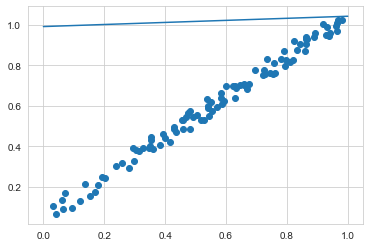

In [77]:
import statsmodels.api as sm

X = np.random.rand(100)
Y = X + np.random.rand(100)*0.1

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

plt.show()

In [79]:
X = df.iloc[:, 0].values.reshape(-1, 1)
Y = df.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

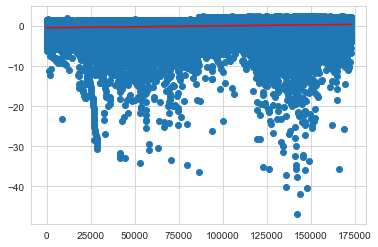

In [80]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [81]:
from sklearn import linear_model
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-0.41646162]
Coefficients: 
 [[4.88036732e-06]]


In [87]:
# create and fit RandomForestClassifier model  
rfc=RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [88]:
#predict
pred = rfc.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
rfc_acc= accuracy_score(Y_test, pred)
print('The accuracy score using the RandomForestClassifier (befor resample) is :',rfc_acc)

The accuracy score using the RandomForestClassifier (befor resample) is : 1.0


In [90]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93262
           1       1.00      1.00      1.00       131

    accuracy                           1.00     93393
   macro avg       1.00      1.00      1.00     93393
weighted avg       1.00      1.00      1.00     93393



In [91]:
# create and fit DecisionTreeClassifier model
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [92]:
#predict
pred = dtc.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
dtc_acc = accuracy_score(Y_test, pred)
print('The accuracy score with using the decision tree classifier is :',dtc_acc)

The accuracy score with using the decision tree classifier is : 1.0


In [94]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93262
           1       1.00      1.00      1.00       131

    accuracy                           1.00     93393
   macro avg       1.00      1.00      1.00     93393
weighted avg       1.00      1.00      1.00     93393



In [95]:
# create and fit KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
#predict
pred = knn.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
#KNN accuracy score

Knn_acc= accuracy_score(Y_test, knn.predict(X_test))
print('The accuracy socre using the KNeighborsClassifier is :',Knn_acc)

The accuracy socre using the KNeighborsClassifier is : 0.9986187401625389


In [98]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93262
           1       0.58      0.05      0.10       131

    accuracy                           1.00     93393
   macro avg       0.79      0.53      0.55     93393
weighted avg       1.00      1.00      1.00     93393



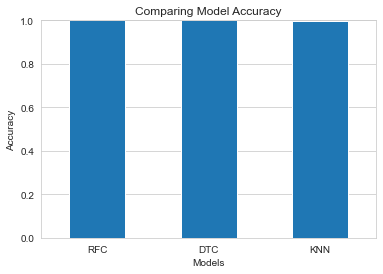

In [99]:
pd.DataFrame([rfc_acc, dtc_acc, Knn_acc]).plot.bar();
plt.xticks(np.arange(3),('RFC','DTC','KNN'))
plt.legend().remove()
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 0)
plt.title('Comparing Model Accuracy');
# plt.savefig("abc.png")
# files.download("abc.png")

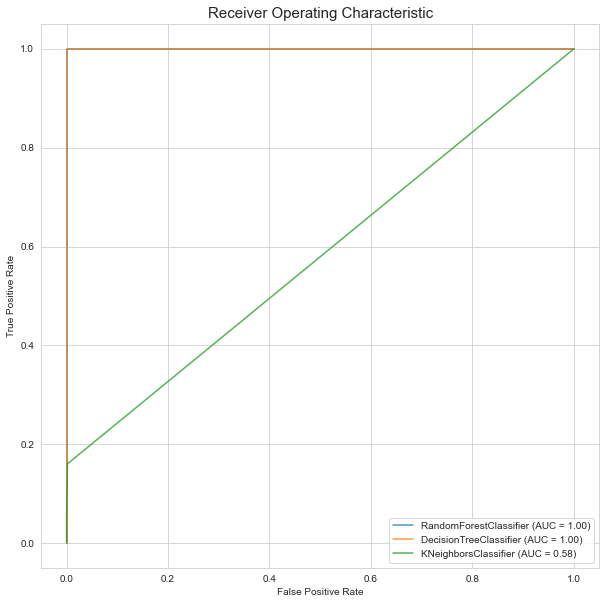

In [100]:
# ROC/AUC curve
plt.figure(figsize = (10,10))
ax = plt.gca()
ax.set_title('Receiver Operating Characteristic',size = 15)
rfc_disp = plot_roc_curve(rfc, X_test, Y_test, ax = ax, alpha = 0.8, name = 'RandomForestClassifier')
tree_disp = plot_roc_curve(dtc, X_test, Y_test,  ax = ax, alpha = 0.8, name = 'DecisionTreeClassifier')
knn_disp =  plot_roc_curve(knn, X_test, Y_test,  ax = ax, alpha = 0.8, name = 'KNeighborsClassifier')